<a href="https://colab.research.google.com/github/QwertyJacob/colab_handouts_PSI/blob/main/BONUS_C14_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduzione:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

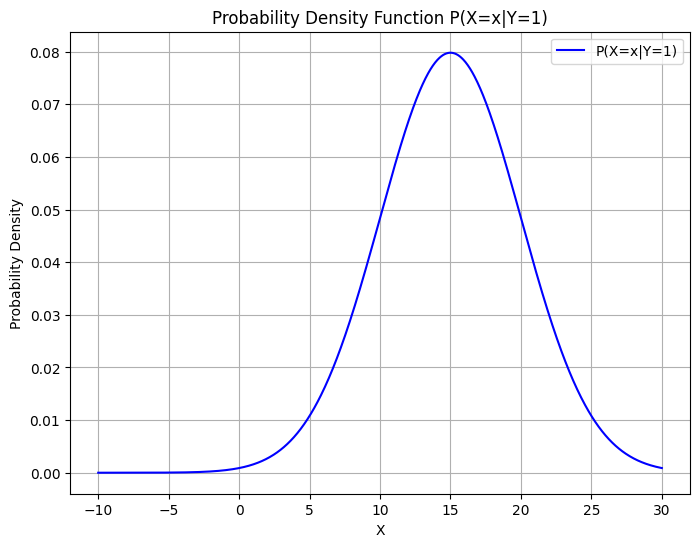

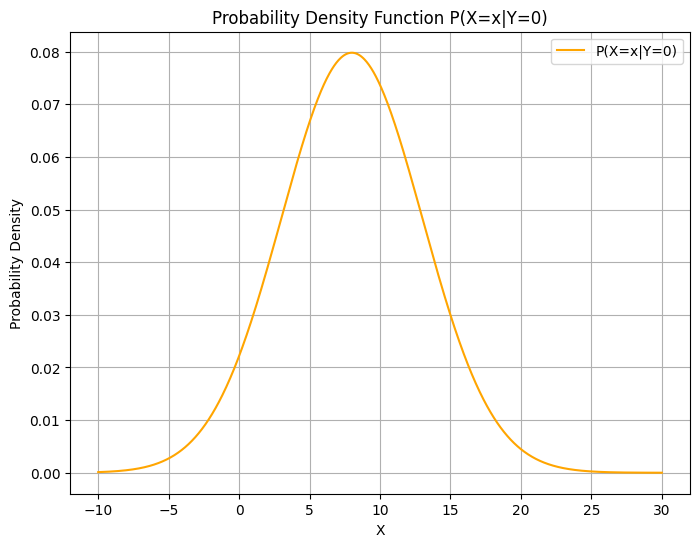

In [2]:
# Parameters for the first Gaussian (mean=15, std=5)
mean_1 = 15
std_1 = 5

# Parameters for the second Gaussian (mean=8, std=5)
mean_2 = 8
std_2 = 5

# Generate x values
x_values = np.linspace(-10, 30, 1000)

# Calculate the probability density functions (PDFs) for each Gaussian
pdf_1 = norm.pdf(x_values, mean_1, std_1)
pdf_2 = norm.pdf(x_values, mean_2, std_2)

# Plotting the first diagram
plt.figure(figsize=(8, 6))
plt.plot(x_values, pdf_1, label='P(X=x|Y=1)', color='blue')
plt.title('Probability Density Function P(X=x|Y=1)')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the second diagram
plt.figure(figsize=(8, 6))
plt.plot(x_values, pdf_2, label='P(X=x|Y=0)', color='orange')
plt.title('Probability Density Function P(X=x|Y=0)')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

<>:20: SyntaxWarning: invalid escape sequence '\e'
<>:28: SyntaxWarning: invalid escape sequence '\e'
<>:20: SyntaxWarning: invalid escape sequence '\e'
<>:28: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-1428326810.py:20: SyntaxWarning: invalid escape sequence '\e'
  plt.fill_between(rectangle_x, 0, rectangle_y, color='red', alpha=0.3, label='$P(1-\epsilon<X<1+\epsilon)$')
/tmp/ipython-input-1428326810.py:28: SyntaxWarning: invalid escape sequence '\e'
  plt.title('Approssimazione di probabilità in corrispondenza di $X=1$ $(\epsilon=0.05)$')


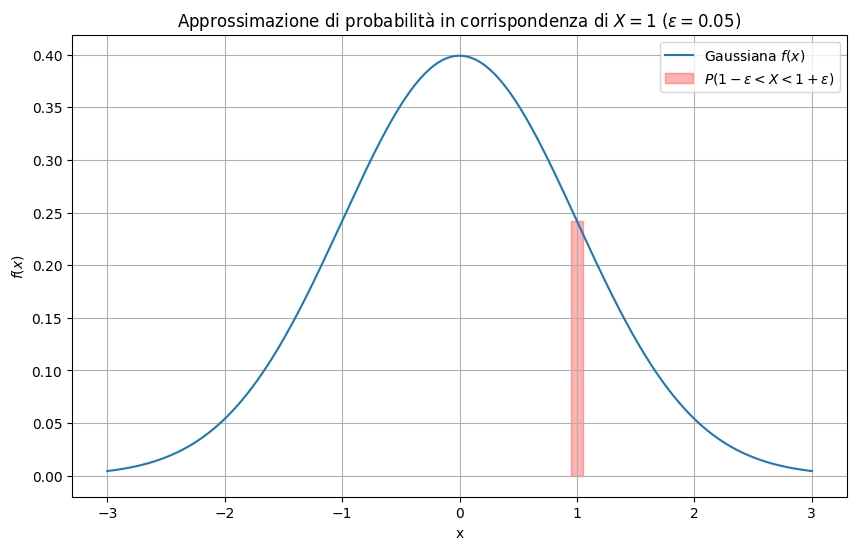

In [3]:

# Define parameters for the Gaussian
mean = 0
std = 1

# Generate x values
x_values = np.linspace(-3, 3, 1000)

# Calculate the Gaussian function (PDF)
pdf_values = norm.pdf(x_values, mean, std)

plt.figure(figsize=(10, 6))

# Plot the Gaussian function
plt.plot(x_values, pdf_values, label='Gaussiana $f(x)$')

# Add a real rectangle between x=0.95 and x=1.05 with the same height as f(1)
rectangle_height = norm.pdf(1, mean, std)
rectangle_x = [0.95, 1.05]
rectangle_y = [rectangle_height, rectangle_height]
plt.fill_between(rectangle_x, 0, rectangle_y, color='red', alpha=0.3, label='$P(1-\epsilon<X<1+\epsilon)$')

# Highlight the point (1, f(1))
plt.scatter(1, rectangle_height, color='red', marker='')

# Set labels and title
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.title('Approssimazione di probabilità in corrispondenza di $X=1$ $(\epsilon=0.05)$')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [4]:
from mpl_toolkits.mplot3d import Axes3D

In [5]:

# Define the 2D Gaussian function
def gaussian_2d(x, y, mean, cov):
    xy = np.column_stack((x, y))
    inv_cov = np.linalg.inv(cov)
    exponent = -0.5 * np.sum((xy - mean) @ inv_cov * (xy - mean), axis=1)
    return np.exp(exponent) / (2 * np.pi * np.sqrt(np.linalg.det(cov)))


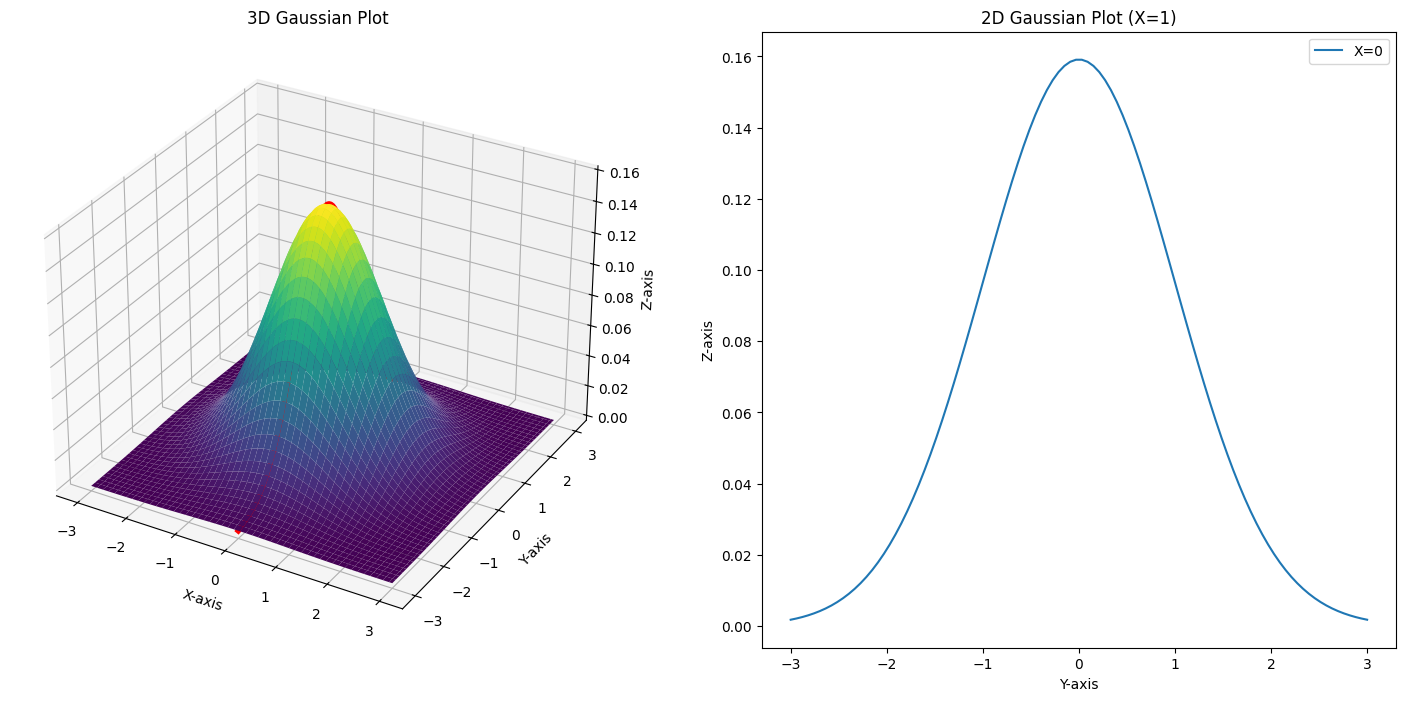

In [6]:
# Create a 3D plot
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(121, projection='3d')

# Set mean and covariance
mean = np.array([0, 0])
covariance = np.identity(2)

# Create a grid of X, Y values
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Evaluate the Gaussian function
Z = gaussian_2d(X.flatten(), Y.flatten(), mean, covariance)
Z = Z.reshape(X.shape)

# Plot the 3D surface
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Gaussian Plot')

# Fix X=1
x_fixed = 0

# Add a line for X=1
ax.plot([x_fixed]*len(y), y, gaussian_2d(np.full_like(y, x_fixed), y, mean, covariance), color='red', linewidth=4, label=f'X={x_fixed}')


# Create a 2D plot when X=1
ax2 = fig.add_subplot(122)


Z_fixed = gaussian_2d(np.full_like(y, x_fixed), y, mean, covariance)

# Plot the 2D function
ax2.plot(y, Z_fixed, label=f'X={x_fixed}')
ax2.set_xlabel('Y-axis')
ax2.set_ylabel('Z-axis')
ax2.set_title('2D Gaussian Plot (X=1)')
ax2.legend()

# Show the plots
plt.show()

# Test di carbonio 14:



Siamo in grado di conoscere l'età di antichi reperti utilizzando un processo chiamato datazione al carbonio. Questo processo comporta molta incertezza! Osservi una misurazione del 90% di molecole naturali di C14 in un campione. Qual è la tua distribuzione di credenza sull'età del campione? Questo compito richiede modelli probabilistici perché dobbiamo considerare insieme due variabili aleatorie: l'età $ A $ del campione e $ M $ le molecole di C14 rimanenti.

Dimostrazione:
Immagina di aver appena prelevato un campione dal tuo reperto. Per la dimensione del campione che hai prelevato, un organismo vivente avrebbe avuto **1000** molecole di C14. Usa questa dimostrazione per esplorare la relazione tra la quantità di C14 rimasta e la tua distribuzione di credenza sull'età del tuo reperto.



> Nota: questa demo è stata creata nel **2023** e l'età riportata è relativa a quell'anno! Questo materiale ha solo i tassi storici di C14 di 10.000 anni fa e come tale non è in grado di stimare l'età quando ci sono meno di 350 molecole di C14 nel campione.


## Comprendere il decadimento della molecola di C14

Tutti gli esseri viventi hanno una proporzione costante di una molecola radioattiva chiamata C14. Quando gli esseri viventi muoiono, queste molecole iniziano a decadere radioattivamente. Specificamente, il tempo di decadimento in anni, $ T $, di una singola molecola di C14 è distribuito come un'esponenziale, $ T \sim Exp(\lambda = 1/8267) $, dove 8267 è la vita media del C14.


Consideriamo una singola molecola di C14. Qual è la probabilità che decada entro 750 anni?

$$ P(T \le 750) = 1 - e^{-\lambda \cdot 750} $$

Sostituendo $\lambda = \frac{1}{8267}$:

$$ = 1 - e^{-\frac{1}{8267} \cdot 750} = 1 - e^{-\frac{750}{8267}} \approx 0.0867 $$

(CDF Esponenziale)

Questo valore si riferisce a una singola molecola. Poiché le molecole di C14 decadono in modo indipendente, non è molto più complesso ragionare sul numero di molecole rimanenti a partire da un numero iniziale più elevato. Un particolare campione ha avuto inizio con 1000 molecole. Qual è la probabilità che esattamente 900 molecole siano ancora presenti dopo 750 anni? Tale evento è equivalente al fatto che 100 molecole siano decadute.

Sia $ X \sim \text{Bin}(n = 1000, p = 0.0867) $ il numero di molecole decadute.

$$ P(X = 100) = \binom{1000}{100} (0.0867)^{100} (1 - 0.0867)^{900} \approx 0.0144 $$

Generalizziamo. Definiamo $ M $ come una variabile aleatoria che rappresenta il numero di molecole rimanenti, e $ A $ come l'età del campione. La probabilità $ P(M = m \mid A = i) $ di avere $ m $ molecole di C14 rimanenti, dato che l'oggetto ha $ i $ anni, è uguale a $ P(X = n - m) $, dove $ n $ è il numero iniziale di molecole di C14, $ p = 1 - e^{-i/8267} $, e $ X \sim \text{Bin}(n, p) $ è il numero di molecole di C14 decadute.

**Inferenza dell'età a partire dal C14**

Osserviamo una misura di 900 molecole di C14 in un campione. Assumiamo che il campione avesse inizialmente 1000 molecole di C14 al momento della morte dell'organismo. Vogliamo inferire la probabilità $ P(A = i \mid M = 900) $, dove $ A = i $ è l'evento che l'organismo sia morto $ i $ anni fa. L'età $ A $ è una variabile aleatoria discreta che assume valori interi.

Questo è un caso classico di applicazione del teorema di Bayes, in cui non stiamo semplicemente aggiornando la probabilità di un singolo evento, ma stiamo inferendo la distribuzione di probabilità su tutti i possibili valori di una variabile aleatoria: un processo noto come **inferenza statistica**.

La versione generalizzata del teorema di Bayes per l'inferenza dell'età $ A $ è:

$$
P(A = i \mid M = 900) = \frac{P(M = 900 \mid A = i) \cdot P(A = i)}{P(M = 900)}
$$

Possiamo riscrivere questa espressione come:

$$
P(A = i \mid M = 900) = P(M = 900 \mid A = i) \cdot \frac{P(A = i)}{P(M = 900)}
$$

$$
= P(M = 900 \mid A = i) \cdot K
$$

L'ultimo passaggio sfrutta il fatto che il termine $ \frac{P(A = i)}{P(M = 900)} $ è costante rispetto a $ i $, poiché la probabilità _a priori_ $ P(A = i) $ è uniforme nell'intervallo $ 100 \le i \le 10000 $.

Più specificamente:

- $ P(A = i) = \frac{1}{9901} $ per $ i \in [100, 10000] $
- $ P(M = 900) $ è una costante di normalizzazione calcolata mediante la legge della probabilità totale:

$$
P(M = 900) = \sum_{j=100}^{10000} P(M = 900 \mid A = j) \cdot P(A = j) = \frac{1}{9901} \sum_{j=100}^{10000} P(M = 900 \mid A = j)
$$

**Storia fluttuante**

La quantità di C14 nell'atmosfera varia nel tempo; non si tratta di una baseline costante! Di seguito è riportato il delta C14 (per 1000 molecole) che si sarebbe osservato se l'oggetto fosse morto un certo numero di anni fa. Per incorporare questa informazione, modifichiamo semplicemente il numero iniziale di molecole di C14 nel modello binomiale: anziché partire da 1000 molecole, partiamo da $ 1000 + \delta(i) $ molecole, dove $ \delta(i) $ è il valore di delta C14 corrispondente all'anno $ i $ in cui l'organismo è morto, ottenuto da un dataset pubblico.

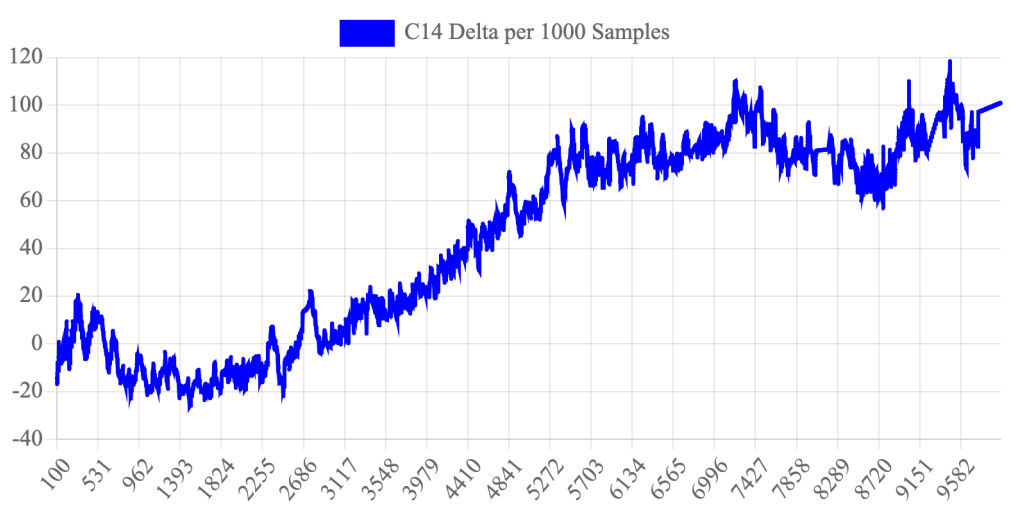

Questo offset appartiene alla teoria archeologica, non alla teoria della probabilità. Lo includiamo in questo capitolo perché, altrimenti, il nostro codice fornirebbe una previsione errata. Inoltre, conferisce alla distribuzione a posteriori una forma particolarmente interessante (si veda la demo).

## Codice:
La matematica, derivata in precedenza, porta al seguente codice Python per una funzione `inference(m)` che restituisce la funzione di massa di probabilità per l'età $ A $, dato un'osservazione di $ m $ molecole di C14 in un campione che, se fosse vivo oggi (2023), dovrebbe avere 1000 molecole. Si noti l'uso della normalizzazione per evitare di calcolare esplicitamente il termine a priori o $ P(M = m) $ nel teorema di Bayes.

In [9]:
import json
from scipy import stats
import math
import matplotlib.pyplot as plt

In [10]:
historical_c14_delta = None
C14_MEAN_LIFE = 8267
MIN_AGE = 400
MAX_AGE = 1200

In [12]:
def inference(m = 900):
    """
    Returns a dictionary A, where A[i] contains the
    corresponding probability, P(A = i| M = m).
    m is the number of C14 molecules remaining and i
    is age in years. i is in the range 100 to MAX_AGE
    """
    A = {}
    n_years = MAX_AGE - MIN_AGE + 1
    for i in range(MIN_AGE,MAX_AGE+1):
        A[i] = calc_likelihood(m, i)  # P(M = m | A = i)
    # implicitly computes the normalization constant
    normalize(A)
    return A

def calc_likelihood(m, age):
    """
    Computes P(M = m | A = age), the probability of
    having m molecules left given the sample is age
    years old. Uses the exponential decay of C14
    """
    n_original = 1000 + delta_start(age)
    p_remain = math.exp(-age/C14_MEAN_LIFE)
    return stats.binom.pmf(m, n_original, p_remain)

def normalize(prob_dict):
    # first compute the sum of the probability
    sum = 0
    for key, pr in prob_dict.items():
        sum += pr
    # then divide each probability by that sum
    for key, pr in prob_dict.items():
        prob_dict[key] = pr / sum
    # now the probabilities sum to 1 (aka are normalized)

def delta_start(age):
    """
    The amount of atmospheric C14 is not the same every
    year. If the sample died "age" years ago, then it would
    have started with slightly more, or slightly less than
    1000 C14 molecules. We can look this value up from the
    IntCal database. See the next section!
    """
    if not historical_c14_delta:
        load_c14_delta()
    return int(round(historical_c14_delta[age]))

def load_c14_delta():
    global historical_c14_delta
    raw = json.load(open('/content/drive/MyDrive/Teaching/Statistics/inferenza bayesiana/historical_c14.json'))
    historical_c14_delta = {}
    for age, value in raw.items():
        historical_c14_delta[int(age)] = float(value['deltaC14'])


def plot_belief(belief):
    # Extract keys and values from the dictionary
    x = list(belief.keys())
    y = list(belief.values())

    # Create a bar chart (you can use different types of plots as needed)
    plt.bar(x, y,width=1.0)

    # Add labels and title
    plt.xlabel('age')
    plt.ylabel('P(A = age)')

    # Show the plot
    plt.show()

In [13]:
belief = inference(500)
print(belief[450])
print(belief[753])
plot_belief(belief)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Teaching/Statistics/inferenza bayesiana/historical_c14.json'

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Campionamento:

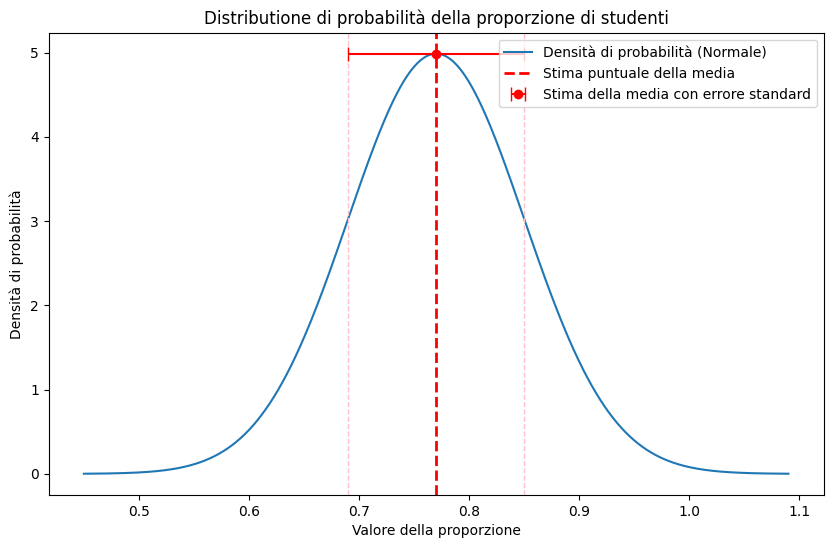

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the Gaussian distribution
mean_estimation = 0.77
std_deviation = 0.08

# Data for plotting
x = np.linspace(mean_estimation - 4 * std_deviation, mean_estimation + 4 * std_deviation, 1000)
y = norm.pdf(x, mean_estimation, std_deviation)

# Set a larger figure size
plt.figure(figsize=(10, 6))

# Create the plot
plt.plot(x, y, label='Densità di probabilità (Normale)')
plt.axvline(mean_estimation, color='red', linestyle='dashed', linewidth=2, label='Stima puntuale della media')
plt.axvline(mean_estimation-std_deviation, color='pink', linestyle='dashed', linewidth=1, )
plt.axvline(mean_estimation+std_deviation, color='pink', linestyle='dashed', linewidth=1, )

# Set labels and title
plt.xlabel('Valore della proporzione')
plt.ylabel('Densità di probabilità')
plt.title('Distributione di probabilità della proporzione di studenti')

# Add error bars for the mean
plt.errorbar(mean_estimation, norm.pdf(mean_estimation, mean_estimation, std_deviation),
             xerr=std_deviation, fmt='o', capsize=5, color='red', label='Stima della media con errore standard')

# Show the legend
plt.legend()

# Show the plot
plt.show()


# Bootstrapping!

In [ ]:
p = 0.77  # Proporzione Campionaria
sample_size = 34  # Size del campione
num_extractions = 10000  # Numero di campionamenti simulati ;)

sample_variances = []
sample_means = []

def bootstrap():

    # Per ogni campionamento:
    for _ in range(num_extractions):
        # Simulazione del campionamento:
        X = np.random.binomial(1, p, sample_size)
        # Calcolo e salvo la media campionaria
        sample_means.append(np.mean(X))
        # Calcolo e salvo la varianza campionaria
        sample_variance = np.var(X, ddof=1)  # ddof=1 -> dividere per(n-1)
        sample_variances.append(sample_variance)


bootstrap()

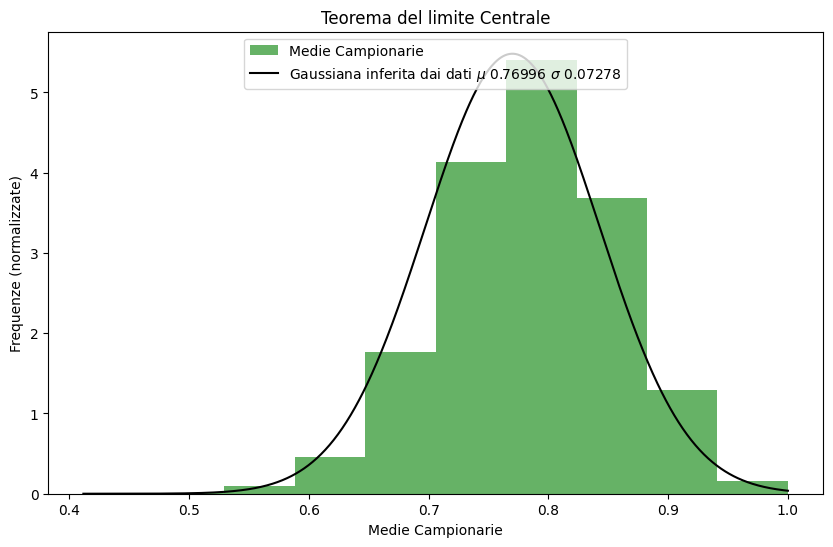

In [ ]:
from scipy.optimize import curve_fit

# Generate a sample list of numbers (replace this with your actual list)
data = sample_means

# Fit the data to a normal distribution (Gaussian)
mu, std = norm.fit(data)

# Generate x values for the plot
x_values = np.linspace(min(data), max(data), 1000)

plt.figure(figsize=(10, 6))

# Plot the histogram of the data
plt.hist(data, bins=10, density=True, alpha=0.6, color='g', label='Medie Campionarie')

# Plot the fitted Gaussian distribution
pdf = norm.pdf(x_values, mu, std)
plt.plot(x_values, pdf, 'k', label=f'Gaussiana inferita dai dati $\mu$ {mu:.5f} $\sigma$ {std:.5f}')

# Display the plot
plt.xlabel('Medie Campionarie')
plt.ylabel('Frequenze (normalizzate)')
plt.title('Teorema del limite Centrale')
# Place the legend in the upper-right corner
plt.legend(loc='upper center')

plt.show()


In [ ]:
"""
Dato un campione (stavolta di dimensione 10000)
di varianze campionarie, mi calcolo a sua volta
la varianza campionaria di quel campione
"""
meta_variance = np.var(sample_variances, ddof=1)

"""
La radice quadrata di tale meta-varianza campionaria
sarà la meta-deviazione standard

Cioè l'errore standard della varianza campionaria.
"""
std_err_sample_var = np.sqrt(meta_variance)

print(f'Stima per la varianza: {np.mean(sample_variances):.5f}')
print(f'Errore standard della stima per la varianza: {std_err_sample_var:.5f}')

Stima per la varianza: 0.17734
Errore standard della stima per la varianza: 0.03965


In [ ]:
for i in range(10):
    sample_variances = []
    sample_means = []
    bootstrap()

    meta_variance = np.var(sample_variances, ddof=1)
    std_err_sample_var = np.sqrt(meta_variance)

    print(f'Stima per la varianza: {np.mean(sample_variances):.5f}')
    print(f'Errore std della stima per la varianza: {std_err_sample_var:.5f}')

Stima per la varianza: 0.17707
Errore std della stima per la varianza: 0.03974
Stima per la varianza: 0.17722
Errore std della stima per la varianza: 0.03993
Stima per la varianza: 0.17700
Errore std della stima per la varianza: 0.03981
Stima per la varianza: 0.17750
Errore std della stima per la varianza: 0.03921
Stima per la varianza: 0.17775
Errore std della stima per la varianza: 0.03953
Stima per la varianza: 0.17767
Errore std della stima per la varianza: 0.03967
Stima per la varianza: 0.17775
Errore std della stima per la varianza: 0.03940
Stima per la varianza: 0.17690
Errore std della stima per la varianza: 0.03972
Stima per la varianza: 0.17630
Errore std della stima per la varianza: 0.03982
Stima per la varianza: 0.17641
Errore std della stima per la varianza: 0.03958


In [ ]:
# Simulazione del campionamento:
X = np.random.binomial(1, p, 34)
# Calcolo e salvo la media campionaria
sample_mean = np.mean(X)
# Calcolo e salvo la varianza campionaria
sample_variance = np.var(X, ddof=1)  # ddof=1 -> dividere per(n-1)


print('Varianza campionaria: ', sample_variance)
print('Dev. Standard campionaria: ', np.sqrt(sample_variance))

Varianza campionaria:  0.20053475935828882
Dev. Standard campionaria:  0.4478110755198991
